# Import necessary libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset and visualize it

The shape of dataset is (24, 2)


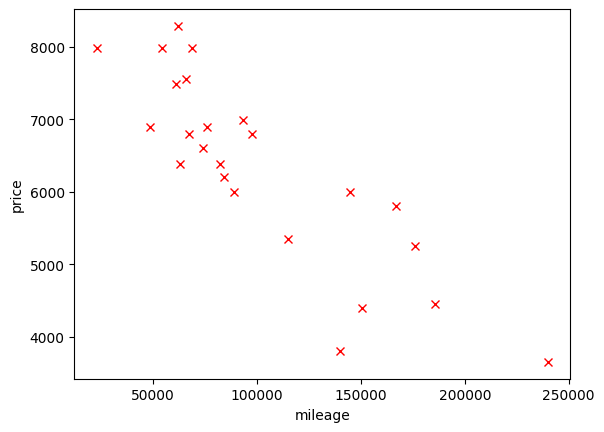

In [37]:
dataset = pd.read_csv('data.csv')
print(f"The shape of dataset is {dataset.shape}")
mileage = np.array(dataset['km'])
price = np.array(dataset['price'])
plt.plot(mileage, price, 'rx')
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()


# Normalize the dataset to avoid overflow

In [38]:
min_mileage = np.min(mileage)
max_mileage = np.max(mileage)
min_price = np.min(price)
max_price = np.max(price)
new_mileage = (mileage - min_mileage) / (max_mileage - min_mileage)
new_price = (price - min_price) / (max_price - min_price)

# Train the model to output the values of theta0 and theta1

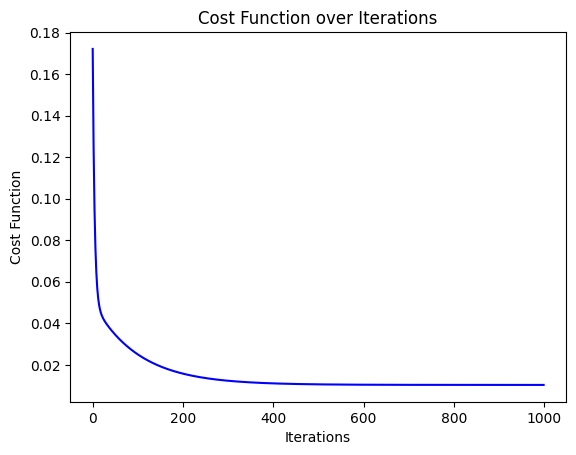

In [39]:
alpha = 0.1
iterations = 1000
theta0 = 0
theta1 = 0
cost_history = []

for i in range(iterations):
    temp1 = theta1 - alpha * np.sum([theta0 * new_mileage[j] + theta1 - new_price[j] for j in range(len(new_mileage))]) / len(new_mileage)
    temp0 = theta0 - alpha * np.sum([(theta0 * new_mileage[j] + theta1 - new_price[j]) * new_mileage[j] for j in range(len(new_mileage))]) / len(new_mileage)
    theta1 = temp1
    theta0 = temp0
    cost_function = np.sum([(theta0 * new_mileage[j] + theta1 - new_price[j]) ** 2 for j in range(len(new_mileage))]) / (2 * len(new_mileage))
    cost_history.append(cost_function)

plt.plot(range(iterations), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function over Iterations')
plt.show()

# Denormalize Theta0 and Theta1

In [40]:
theta0 = theta0 * (max_price - min_price) / (max_mileage - min_mileage)
theta1 = theta1 * (max_price - min_price) + min_price - theta0 * min_mileage

# Visualize the dataset and the line 

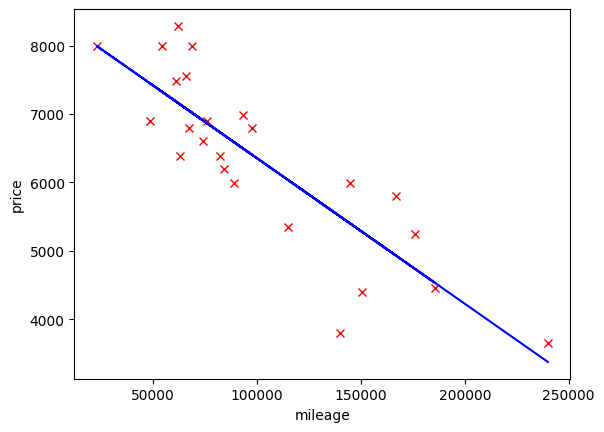

In [41]:
plt.plot(mileage, price, 'rx')
plt.plot(mileage, theta0 * mileage + theta1, 'b-')
plt.xlabel('mileage')
plt.ylabel('price')
plt.show()

# Write the values of theta0 and theta1 on file

In [42]:
with open('theta_values.txt', 'w') as file:
        file.write(f"{theta0}\n{theta1}")